# [Import Libraries](#0)

In [1]:
import pandas as pd
import numpy as np
from sklearn import (metrics, linear_model, preprocessing)
from sklearn.model_selection import cross_validate
from sklearn.impute import SimpleImputer
import matplotlib.pyplt as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# <a id='7'>Q1) Open the csv file into a data frame 'carprice' with missing value dot 'Nan'<a/>

In [2]:
path = 'carprice.csv'
df = pd.read_csv(path, na_values = 'Nan')
df.head()

,car_id,price,Kilometers,hp,Brand,Sport,age,Users,gas,Metalilic,CC,Weight,QuartTax,Automatic,red,Owner_gender,door
0,3548,48750,NaN,110,6,YES,7,1,590.0,NO,1800,1170.0,100,YES,NO,M,4
1,903,16610,NaN,110,3,NO,8,1,391.0,YES,2200,1250.0,270,YES,NO,F,4
2,3903,27100,3040.0,110,2,YES,8,1,478.0,NO,1900,1186.0,120,YES,YES,M,4
3,5098,24240,4690.0,110,5,NO,8,1,NaN,NO,1800,1170.0,100,YES,NO,M,4
4,3364,13030,5820.0,110,5,NO,9,1,NaN,YES,2200,1250.0,80,NO,NO,F,4


In [3]:
print('CarPrice Data - rows:' , df.shape[0],'columns:', df.shape[1])

CarPrice Data - rows: 5239 columns: 17


# <a id='7'>Q2) For each variable in the data frame, check the number of missing values<a/>

In [4]:
print("There is {} missing values in the dataframe".format(df.isnull().sum().sum()))

There is 1189 missing values in the dataframe


In [5]:
# Checking for % of missing values in our data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total','Percent']).transpose()

,Weight,Kilometers,gas,Users,price,hp,Brand,Sport,age,door,Owner_gender,Metalilic,CC,QuartTax,Automatic,red,car_id
Total,570.000000,358.000000,261.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,10.879939,6.833365,4.981867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# &#9758; Observation: 
- Weight has 10% of missing data
- Kilometers has 6.8% of missing data
- Gas has 4.98% of missing data

# <a id='7'>Q3) Extract the data frame (to replace data frame 'carprice') with the values of the following variables 'gas, Kilometers, age, Weight, QuartTax' non-negative<a/>

In [7]:
df1 = df[['gas','Kilometers','age','Weight','QuartTax']]
df1.head()

,gas,Kilometers,age,Weight,QuartTax
0,590.0,NaN,7,1170.0,100
1,391.0,NaN,8,1250.0,270
2,478.0,3040.0,8,1186.0,120
3,NaN,4690.0,8,1170.0,100
4,NaN,5820.0,9,1250.0,80


# <a id='7'>Q4) Check the numbers of levels of the variables 'Brand, hp, cc, Users, door'. Should these features be considered as continuous or categorical variables?<a/>

In [8]:
# check categrical variables. should Brand, hp, cc, Users, and door be considered as continous or categirical?
v = ['hp', 'Brand', 'Sport', 'Users', 'CC', 'Automatic', 'red', 'Owner_gender','door']

for j in range(len(v)):
    field = v[j]
    print ('-------------------- ' + field + ' -----------------------------')
    z = ['levels for the variable '+ field + ':']
    s = df[field].value_counts()
    ind = list(s.index)
    z.extend(ind)
    print (z)
    
    z = ['# of levels for the variable '+ field + ':']
    s = list(df[field].value_counts())
    z.extend(s)
    print (z)
    
    z = ['# of categories for the variable '+ field + ':']
    z.extend([len(s)])
    print (z)
    print ('-------------------------------------------------')

-------------------- hp -----------------------------
['levels for the variable hp:', 192, 110, 90, 70]
['# of levels for the variable hp:', 1804, 1504, 1480, 451]
['# of categories for the variable hp:', 4]
-------------------------------------------------
-------------------- Brand -----------------------------
['levels for the variable Brand:', 4, 5, 3, 2, 6, 1]
['# of levels for the variable Brand:', 1401, 934, 823, 711, 685, 685]
['# of categories for the variable Brand:', 6]
-------------------------------------------------
-------------------- Sport -----------------------------
['levels for the variable Sport:', 'NO', 'YES']
['# of levels for the variable Sport:', 3159, 2080]
['# of categories for the variable Sport:', 2]
-------------------------------------------------
-------------------- Users -----------------------------
['levels for the variable Users:', 1, 2, 3]
['# of levels for the variable Users:', 3178, 1743, 318]
['# of categories for the variable Users:', 3]
-----

# <a id='7'>Q5) Generate the missing dummy variables for those features with missing values, and impute the values with missing values<a/>

In [ ]:
# now we impute missing values and generate missing dummy variables

In [10]:
# here i created 3 dummy columns
df['Kilometers_miss_fg'] = df.Kilometers.isnull() + 0
df['gas_miss_fg'] = df.gas.isnull() + 0
df['Weight_miss_fg'] = df.Weight.isnull() + 0

# impute missing values for the three columns with missing values
varlistnum = ['Kilometers','gas','Weight']

# here i wrote this simple for loop to fill null values with the median of each column
for varname in varlistnum:
    df[varname].fillna(df[varname].median(), inplace=True)
    
df.head()    

,car_id,price,Kilometers,hp,Brand,Sport,age,Users,gas,Metalilic,CC,Weight,QuartTax,Automatic,red,Owner_gender,door,Kilometers_miss_fg,gas_miss_fg,Weight_miss_fg
0,3548,48750,109300.0,110,6,YES,7,1,590.0,NO,1800,1170.0,100,YES,NO,M,4,1,0,0
1,903,16610,109300.0,110,3,NO,8,1,391.0,YES,2200,1250.0,270,YES,NO,F,4,1,0,0
2,3903,27100,3040.0,110,2,YES,8,1,478.0,NO,1900,1186.0,120,YES,YES,M,4,0,0,0
3,5098,24240,4690.0,110,5,NO,8,1,385.0,NO,1800,1170.0,100,YES,NO,M,4,0,1,0
4,3364,13030,5820.0,110,5,NO,9,1,385.0,YES,2200,1250.0,80,NO,NO,F,4,0,1,0


In [12]:
# Checking results for missing values in the dataframe - Data is now clean
df.isna().sum()

car_id                0
price                 0
Kilometers            0
hp                    0
Brand                 0
Sport                 0
age                   0
Users                 0
gas                   0
Metalilic             0
CC                    0
Weight                0
QuartTax              0
Automatic             0
red                   0
Owner_gender          0
door                  0
Kilometers_miss_fg    0
gas_miss_fg           0
Weight_miss_fg        0
dtype: int64

In [11]:
# Making copies of the df
df2 = df[:]

In [21]:
len(df2.columns)

20

In [ ]:
df = df2[:]

# <a id='7'>Q6) Append all the dummy variables generated above to the original data frame 'carprice'<a/>

In [18]:
# Note here i am creating dummy variables for categorical variables
Metalilic = 'Metalilic' + '_' + df.Metalilic.astype(str)
df_Metalilic = pd.get_dummies(Metalilic)

hp = 'hp' + '_' + df.hp.astype(str)
df_hp = pd.get_dummies(hp)

Brand = 'Brand' + '_' + df.Brand.astype(str)
df_Brand = pd.get_dummies(Brand)

Sport = 'Sport' + "_" + df.Sport.astype(str)
df_Sport = pd.get_dummies(Sport)

Users = 'Users' + '_' + df.Users.astype(str)
df_Users = pd.get_dummies(Users)

CC = 'CC' + '_' + df.CC.astype(str)
df_CC = pd.get_dummies(CC)

Automatic = 'Automatic' + '_' + df.Automatic.astype(str)
df_Automatic = pd.get_dummies(Automatic)

red = 'red' + '_' + df.red.astype(str)
df_red = pd.get_dummies(red)

Owner_gender = 'Owner_gender' + '_' + df.Owner_gender.astype(str)
df_Owner_gender = pd.get_dummies(Owner_gender)

door = 'door' + '_' + df.door.astype(str)
df_door = pd.get_dummies(door)

# concatnating dummy variables to the dataframe
for f in [df_Metalilic, df_hp, df_Brand, df_Sport, df_Users, df_Automatic, df_red, 
          df_Owner_gender , df_door]:
    df = pd.concat([df, f] , axis = 1)
    
print(df.shape)
df.head()

(5239, 44)


,car_id,price,Kilometers,hp,Brand,Sport,age,Users,gas,Metalilic,...,Users_0,Users_1,Automatic_NO,Automatic_YES,red_NO,red_YES,Owner_gender_F,Owner_gender_M,door_2,door_4
0,3548,48750,109300.0,110,6,YES,7,0,590.0,NO,...,1,0,0,1,1,0,0,1,0,1
1,903,16610,109300.0,110,3,NO,8,0,391.0,YES,...,1,0,0,1,1,0,1,0,0,1
2,3903,27100,3040.0,110,2,YES,8,0,478.0,NO,...,1,0,0,1,0,1,0,1,0,1
3,5098,24240,4690.0,110,5,NO,8,0,385.0,NO,...,1,0,0,1,1,0,0,1,0,1
4,3364,13030,5820.0,110,5,NO,9,0,385.0,YES,...,1,0,1,0,1,0,1,0,0,1


In [22]:
# Check results - now we have 44 columns in total as to the initial 20
df.columns

Index(['car_id', 'price', 'Kilometers', 'hp', 'Brand', 'Sport', 'age', 'Users',
       'gas', 'Metalilic', 'CC', 'Weight', 'QuartTax', 'Automatic', 'red',
       'Owner_gender', 'door', 'Kilometers_miss_fg', 'gas_miss_fg',
       'Weight_miss_fg', 'Metalilic_NO', 'Metalilic_YES', 'hp_110', 'hp_192',
       'hp_70', 'hp_90', 'Brand_1', 'Brand_2', 'Brand_3', 'Brand_4', 'Brand_5',
       'Brand_6', 'Sport_NO', 'Sport_YES', 'Users_0', 'Users_1',
       'Automatic_NO', 'Automatic_YES', 'red_NO', 'red_YES', 'Owner_gender_F',
       'Owner_gender_M', 'door_2', 'door_4'],
      dtype='object')

# <a id='7'>Q7) Drop the variables 'Metalilic','hp', 'Brand','Sport', 'Users', 'CC', 'Automatic', 'red','Owner_gender', 'door'   from the data frame 'carprice'<a/>

- note since i already created the dummy variables i have to drop the original columns

In [23]:
v = ['Metalilic','hp', 'Brand', 'Sport', 'Users', 'CC', 'Automatic', 'red', 'Owner_gender', 'door']
df.drop(v, axis = 1, inplace = True)

# <a id='7'>Q8) Produce the QQ plot graph to check if the target variable 'price' is normally distributed. In addition ,produce the density graph for the target variable 'price' to confirm the conclusion.<a/>

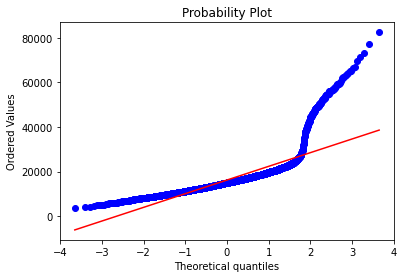

In [24]:
import pylab
import scipy.stats as stats1

Y = df.price
stats1.probplot(Y, dist='norm' , plot=pylab)
pylab.show()

# &#9758; Observation: 
We can see that after trying to fit the data points with the regression line , we have outliers
Which can through off our model so we need to remove the outliers.
                

# [Checking and dealing with Outliers](#0)

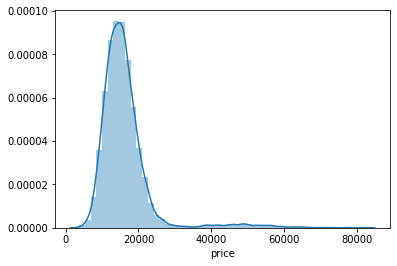

In [25]:
import seaborn as sns
sns.distplot(Y)

# &#9758; Observation: 

- We can see that the data is skewed to the right, hence we need to remove the outliers from 
  around 26000 or 27000.

# Dealing with Outliers

In [29]:
# we want to check the outliers and remove them
s = list(np.arange(2, 100, 2))
for p in s:
    print("The percentile at " + str(p) + ": ", np.percentile(Y, p))

The percentile at 2:  7970.0
The percentile at 4:  8780.0
The percentile at 6:  9362.8
The percentile at 8:  9840.0
The percentile at 10:  10260.0
The percentile at 12:  10570.0
The percentile at 14:  10880.0
The percentile at 16:  11180.0
The percentile at 18:  11470.0
The percentile at 20:  11706.0
The percentile at 22:  11963.599999999999
The percentile at 24:  12170.0
The percentile at 26:  12410.0
The percentile at 28:  12610.0
The percentile at 30:  12880.0
The percentile at 32:  13090.0
The percentile at 34:  13300.0
The percentile at 36:  13480.0
The percentile at 38:  13704.400000000001
The percentile at 40:  13930.0
The percentile at 42:  14130.0
The percentile at 44:  14340.0
The percentile at 46:  14574.8
The percentile at 48:  14770.0
The percentile at 50:  14990.0
The percentile at 52:  15190.0
The percentile at 54:  15380.0
The percentile at 56:  15600.0
The percentile at 58:  15800.0
The percentile at 60:  16040.0
The percentile at 62:  16240.0
The percentile at 64:  16

# &#9758; Observation: 
- We can see that The percentile at 96 is at 26,9821 and @ 98 is 45996 

### [Removing the outliers](#0)

In [30]:
df = df[df['price'] < 26500]
df.describe(include = 'all')

,car_id,price,Kilometers,age,gas,Weight,QuartTax,Kilometers_miss_fg,gas_miss_fg,Weight_miss_fg,...,Users_0,Users_1,Automatic_NO,Automatic_YES,red_NO,red_YES,Owner_gender_F,Owner_gender_M,door_2,door_4
count,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,...,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000,5017.000000
mean,2622.945386,14950.219255,113862.892167,27.350010,418.989037,1188.993223,140.645804,0.068966,0.050030,0.110026,...,0.599362,0.400638,0.336855,0.663145,0.823400,0.176600,0.357385,0.642615,0.150488,0.849512
std,1510.632716,3845.194954,39572.095306,6.265163,97.100144,23.815244,44.880018,0.253421,0.218028,0.312953,...,0.490077,0.490077,0.472682,0.472682,0.381367,0.381367,0.479277,0.479277,0.357585,0.357585
min,1.000000,3650.000000,4690.000000,8.000000,222.000000,1165.000000,80.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1319.000000,12160.000000,87640.000000,23.000000,344.000000,1170.000000,100.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2620.000000,14760.000000,109300.000000,27.000000,385.000000,1186.000000,120.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,3934.000000,17450.000000,135250.000000,32.000000,505.000000,1195.000000,160.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,5239.000000,26490.000000,316220.000000,52.000000,764.000000,1250.000000,270.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
# resetting my target variable as Y
Y = df['price']

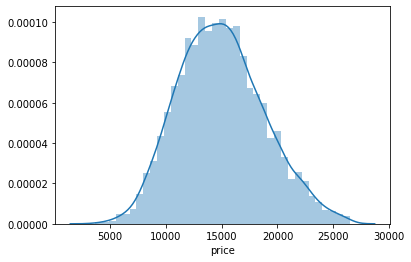

In [33]:
# Checking results
sns.distplot(Y)

# &#9758; Observation: 
- Now we can see the data is has a Normal Distribution

# Rechecking our best fit line 

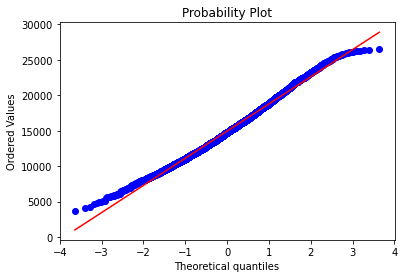

In [34]:
Y = df.price
stats1.probplot(Y, dist='norm', plot=pylab)
pylab.show()

# <a id='7'>Q9) Check the correlation between each independent variable (after data cleaning) and the target variable 'price', and rank the absolute value of the Pearson correlation coefficients in descending order<a/>

In [35]:
varnamelist = list(df.columns)
varnamelist.remove('price')
varnamelist.remove('car_id')
varnamelist

['Kilometers',
 'age',
 'gas',
 'Weight',
 'QuartTax',
 'Kilometers_miss_fg',
 'gas_miss_fg',
 'Weight_miss_fg',
 'Metalilic_NO',
 'Metalilic_YES',
 'hp_110',
 'hp_192',
 'hp_70',
 'hp_90',
 'Brand_1',
 'Brand_2',
 'Brand_3',
 'Brand_4',
 'Brand_5',
 'Brand_6',
 'Sport_NO',
 'Sport_YES',
 'Users_0',
 'Users_1',
 'Automatic_NO',
 'Automatic_YES',
 'red_NO',
 'red_YES',
 'Owner_gender_F',
 'Owner_gender_M',
 'door_2',
 'door_4']

In [36]:
corr = []
for vname in varnamelist:
    X=df[vname]  # loop through all variables in the dataframe
    C = np.corrcoef(X, Y) # calculate correlation matrix
    beta=np.round(C[1, 0],3)
    corr=corr+[beta] 

corrdf=pd.DataFrame({'varname': varnamelist , 'correlation': corr})
corrdf['abscorr']=np.abs(corrdf['correlation'])
# sort absoluted correlation in descending order
corrdf.sort_values(by = ['abscorr'] , ascending =False , inplace=True)
seq=range(1,len(corrdf)+1)
corrdf['order']=seq
corrdf.head(20)

,varname,correlation,abscorr,order
25,Automatic_YES,0.726,0.726,1
24,Automatic_NO,-0.726,0.726,2
11,hp_192,0.260,0.260,3
1,age,-0.234,0.234,4
0,Kilometers,-0.185,0.185,5
5,Kilometers_miss_fg,-0.169,0.169,6
14,Brand_1,-0.162,0.162,7
19,Brand_6,0.155,0.155,8
13,hp_90,-0.148,0.148,9
12,hp_70,-0.100,0.100,10


# <a id='7'>Q10) Choose the top 20 variables based on the correlation coefficients above, transform the data with the range standardization and put them into the linear regression model with LASO to select final candidates<a/>

# &#9758; Lasso: 
- Lasso is a regulation method that penalizes the absolute variables of the regression
 coefficients of the model and allows them to reach zero. It is used for feature selection.
 

# <a id="17">Lasso Regression<a/>
Lasso regression is called **L1 regularization** and it is defined as

$$RSS_{LASSO} = \sum_{i=1}^{m}(h_{\theta}(x_{i})-y_{i})^{2} + \alpha \sum_{j=1}^{n}|\theta_{j}|$$

The main difference between ridge and lasso is the penalty but $\alpha$ works the same way.   

### Feature Selection with sklearn's LassoLarsIC( )
To eliminate relatively unimpactful features, we implement Lasso (L1) regression with the LARS algorithm for determing a best lambda (i.e. regularization rate) with BIC (Bayesian Information Criterion) as the criterion to optimize (i.e. minimize). A custom function can created to return the coefficients as a dataframe and remaining features as a list after fitting sklearn's LassoLarsIC() function with the data.   
  

[LassoLarsIC Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLarsIC.html)

In [38]:
selev = list(corrdf.varname[:20])
X=df[selev]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)

from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.1)

clf.fit(X_train_minmax, Y)
coef = clf.coef_
print('the coefficients' , clf.coef_)
print("----------------------------------")
print(clf.intercept_)

the coefficients [ 6.28614452e+03 -1.14222897e-13  2.49143565e+03 -7.88610319e+03
 -4.41593925e+02 -2.84206704e+03 -2.09027540e+03  1.79986179e+03
 -3.68003926e+02 -8.55923626e+02 -1.38158361e+03  9.70557782e+02
  1.61676829e+02 -4.64232902e+01  1.26453135e-14  2.40961212e+02
 -5.98629463e+02 -9.07797771e+01  4.80701421e+01 -8.33089668e-14]
----------------------------------
14083.413598074969


# <a id='7'>Q11) Based on the percentiles of the coefficients selected from LASO, use a threshold to choose a set of features<a/>

In [40]:
abs_coef = np.abs(clf.coef_)

L = len(list(clf.coef_))
chosen_vars = [selev[j] for j in range(L) if abs_coef[j] > 1]

print("I have selected " + str(len(chosen_vars)) + ' variables based on LASO, their indices are \n')
chosen_vars      

I have selected 17 variables based on LASO, their indices are 



['Automatic_YES',
 'hp_192',
 'age',
 'Kilometers',
 'Kilometers_miss_fg',
 'Brand_1',
 'Brand_6',
 'hp_90',
 'hp_70',
 'Brand_2',
 'Brand_5',
 'hp_110',
 'Users_1',
 'Brand_4',
 'Brand_3',
 'Weight_miss_fg',
 'door_2']

# <a id='7'>Q12) Create a data frame that contains the only variables selected from the LASO above<a/>

In [41]:
# get the Dataframe with the chosen variables with Lasso
chosen_vars.extend(['price'])
selected_cars_df = df[chosen_vars]
print(selected_cars_df.shape)
selected_cars_df.head()

(5017, 18)


,Automatic_YES,hp_192,age,Kilometers,Kilometers_miss_fg,Brand_1,Brand_6,hp_90,hp_70,Brand_2,Brand_5,hp_110,Users_1,Brand_4,Brand_3,Weight_miss_fg,door_2,price
1,1,0,8,109300.0,1,0,0,0,0,0,0,1,0,0,1,0,0,16610
3,1,0,8,4690.0,0,0,0,0,0,0,1,1,0,0,0,0,0,24240
4,0,0,9,5820.0,0,0,0,0,0,0,1,1,0,0,0,0,0,13030
5,0,0,9,106710.0,0,0,1,0,0,0,0,1,0,0,0,0,0,13940
6,1,0,9,8610.0,0,0,0,0,0,0,0,1,0,1,0,0,0,22190


In [42]:
selected_cars_df.columns

Index(['Automatic_YES', 'hp_192', 'age', 'Kilometers', 'Kilometers_miss_fg',
       'Brand_1', 'Brand_6', 'hp_90', 'hp_70', 'Brand_2', 'Brand_5', 'hp_110',
       'Users_1', 'Brand_4', 'Brand_3', 'Weight_miss_fg', 'door_2', 'price'],
      dtype='object')

# <a id='7'>Q13) Apply the OLS package fit the model (or ANOVA) to observe p values and coefficients<a/>

In [45]:
from statsmodels.formula.api import ols
model = ols('price ~ Automatic_YES + hp_192 + age + Kilometers + Kilometers_miss_fg + \
       Brand_1 + Brand_6 + hp_90 + hp_70 + Brand_2 + Brand_5 + hp_110 + \
       Users_1 + Brand_4 + Brand_3 + Weight_miss_fg + door_2' , selected_cars_df).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     1659.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        21:58:10   Log-Likelihood:                -44046.
No. Observations:                5017   AIC:                         8.812e+04
Df Residuals:                    5001   BIC:                         8.823e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.109e+04     75

# &#9758; Observation: 
- Though we have a high r2 of 0.833 we need to pay close attention to the p-values and remove
 some feautures

# <a id='7'>Q14) Based on the p values above, we need to select the final key drivers. Use the OLS again to fit the linear regression model. Observe p values and coefficients and finally check the F statistics and R square values<a/>

In [47]:
model_2 = ols('price ~ Automatic_YES + hp_192 + age + Brand_1 + Brand_6 + \
hp_90 + hp_70 + Brand_5 + Brand_2 + hp_110 +  Brand_4', selected_cars_df).fit()

print(model_2.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1973.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        22:04:21   Log-Likelihood:                -44523.
No. Observations:                5017   AIC:                         8.907e+04
Df Residuals:                    5006   BIC:                         8.914e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.211e+04    101.634    119.173

# &#9758; Observation: 
- Base on the p-values i removed some of the features which led to a slight reduction of my r2

# <a id='7'>Q15) Conduct model prediction to predict car prices in the training data set. Find prediction errors of all observations in the training data.Calculate MSE, SST, MSE and F statistics values, and compare these results with the previous outputs from the OLS package<a/>

In [57]:
final = ['Automatic_YES','hp_192','age','Brand_1','Brand_6','hp_90','hp_70'
                   , 'Brand_5' , 'Brand_2', 'hp_110' , 'Brand_4']

X = df[final]
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X)

linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train_minmax , Y)
print(linear_reg.intercept_, linear_reg.coef_)

# to get the prediction based on the model
predtrain=linear_reg.predict(X_train_minmax)
y_avg=np.mean(Y)
r_sq = 1-(np.sum(predtrain - Y)**2)/np.sum((y_avg - Y)**2)

# get the root mean squared logarithmic error
rows = X.shape[0]
RMSLE = np.sqrt(np.sum((predtrain - Y)**2) / rows)
print("-------------------------------------------")
print("RMSLE is " + str(RMSLE))

7.87187327616288e+16 [ 6.26940360e+03 -7.87187328e+16 -8.23662037e+03 -1.45948277e+03
  2.40923157e+03 -7.87187328e+16 -7.87187328e+16  1.56619908e+03
 -7.39105616e+02 -7.87187328e+16  8.70454216e+02]
-------------------------------------------
RMSLE is 1730.4545458405578


# <a id='7'>Q16) Using the seaborn package to generate the following graphs:
  a) Scatter plot with raw data points and regression line
    
  b) Scatter plot between the price prediction and prediction error

  c) Scatter plot with raw data points and two regression lines based on Automatic = 'YES' and Automatic= 'No'<a/>

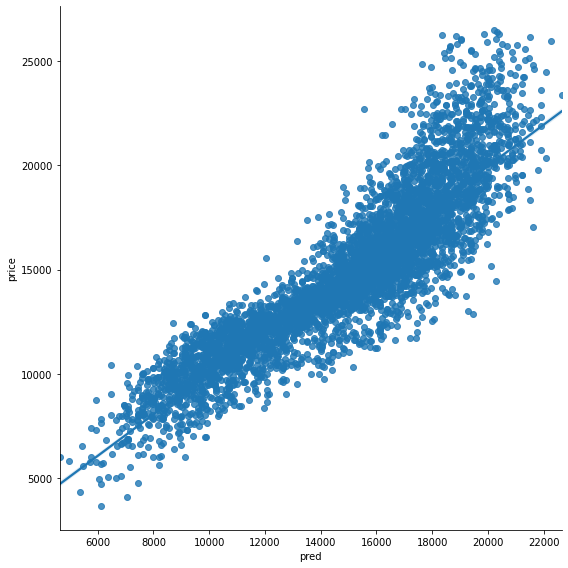

In [61]:
df['pred'] = predtrain
sns.lmplot(x='pred' , y='price' , data = df , fit_reg=True , size=8)

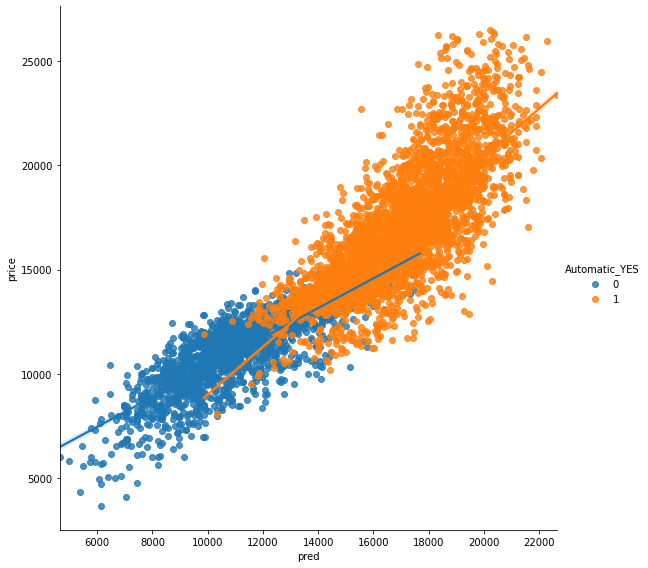

In [62]:
df['pred'] = predtrain
sns.lmplot(x='pred' , y = 'price', hue='Automatic_YES' , data=df , fit_reg=True, size=8)